In [1]:
import scipy.constants as cst
import numpy as np
import matplotlib.pyplot as plt
import Functions
import pandas as pd 
import isa
from scipy.signal import find_peaks
import physicsbasics
from copy import deepcopy 
CO2 = Functions.gas('./Absorbtion Continua up to 5000cm^-1/CO2.csv',44,415.16 )
CH4 = Functions.gas('./Absorbtion Continua up to 5000cm^-1/CH4.csv',16,1.8505 )
N2O = Functions.gas('./Absorbtion Continua up to 5000cm^-1/N2O.csv',44,0.331)
H2O = Functions.gas('./Absorbtion Continua/H2O.csv',18,2500)
H2O_ = Functions.gas('./Absorbtion Continua up to 5000cm^-1/H2O.csv',18,2500)
O3 = Functions.gas('./Absorbtion Continua/O3.csv',48,0.08 )
O3_corssection = Functions.gas_with_crossection('./Absorbtion Continua/Ozone Cross Sections/',48,0.08)

In [2]:
plot_resolution = 100000#um

c:\Users\seanp\OneDrive\Documents\Work\Summer Project\Durham-Radiation\Functions.py:50: RuntimeWarning: invalid value encountered in true_divide
  return pifac*c1*nu**3/(np.exp(c2*nu/temperature)-1)*10**6
c:\Users\seanp\OneDrive\Documents\Work\Summer Project\Durham-Radiation\Functions.py:27: RuntimeWarning: divide by zero encountered in true_divide
  return c1/wavelength**5*(1/(np.exp(c2/(wavelength*temperature))-1))
c:\Users\seanp\OneDrive\Documents\Work\Summer Project\Durham-Radiation\Functions.py:27: RuntimeWarning: overflow encountered in exp
  return c1/wavelength**5*(1/(np.exp(c2/(wavelength*temperature))-1))
c:\Users\seanp\OneDrive\Documents\Work\Summer Project\Durham-Radiation\Functions.py:27: RuntimeWarning: invalid value encountered in multiply
  return c1/wavelength**5*(1/(np.exp(c2/(wavelength*temperature))-1))


Text(0, 0.5, 'Spectral Radiance $(W\\cdot m^{-2} \\cdot \\mu m^{-1})$')

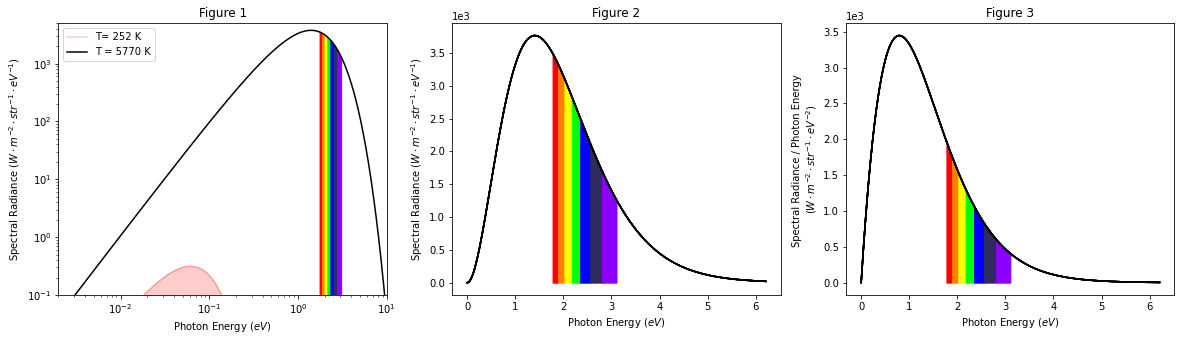

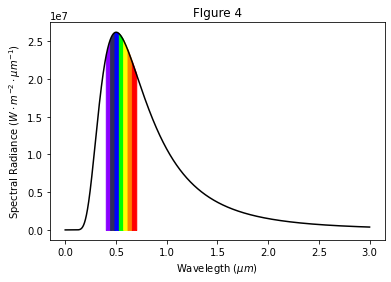

In [3]:
###Defining X axis for plots 
plot_resolution = 100000#um
nu_sun = np.linspace(0,10,plot_resolution)
nu_to_E = cst.c*cst.h*10**6/(1.6*10**-19)
E_sun = nu_sun*nu_to_E
max_E_index = int(plot_resolution/2)
lambda_sun = np.linspace(0,3,plot_resolution)

###Defining Y axis for plots 
I_inc= Functions.plank_nu(nu_sun,5770,Flux = False,units = 'um',)
I_out = Functions.plank_nu(nu_sun,252,Flux = False,units = 'um',)
I_inc_lambda = Functions.plank(lambda_sun,5770,units='um')
I_inc_E = I_inc*nu_to_E
I_out_E = I_out*nu_to_E





###Rainbow Colour 
rgb_tup = [[1,0,0],[1,127/255,0],[1,1,0],[0,1,0],[0,0,1],[46/255,43/255,95/255],[139/255,0,1]]
rainbow_nu = 1/np.linspace(0.7,0.4,8)
rainbow_E = rainbow_nu*1.24


###Plotting 

fig, ax = plt.subplots(1,3,figsize = (20,5)) ##Size and Shape 
ax[0].loglog(E_sun,I_out_E,linestyle = '-',label = 'T= 252 K',color = [1,0,0,0.2])##Sun
ax[0].loglog(E_sun,I_inc_E,c = [0,0,0],label = 'T = 5770 K')##Earth
ax[0].fill_between(E_sun,I_out_E,color = [1,0,0,0.2])
Y = [I_inc_E,I_inc_E,I_inc_E/E_sun]
for plot in range(3):###Rainbow
    for i in range(7):
        start = np.where(nu_sun > rainbow_nu[i])[0][0]
        stop = np.where(nu_sun > rainbow_nu[i+1])[0][0]
        ax[plot].fill_between(E_sun[start:stop],Y[plot][start:stop],color =rgb_tup[i] )
        if plot != 0: 
            ax[plot].plot(E_sun[:max_E_index],Y[plot][:max_E_index], c= 'black')
        

fig1,axs = plt.subplots()
axs.plot(lambda_sun,I_inc_lambda,c = "black")
rainbow_lambda = np.linspace(0.4,0.7,8)
for i in range(7):
        start = np.where(lambda_sun > rainbow_lambda[i])[0][0]
        stop = np.where(lambda_sun > rainbow_lambda[i+1])[0][0]
        axs.fill_between(lambda_sun[start:stop],I_inc_lambda[start:stop],color =rgb_tup[7-(i+1)] )
        
###Labels 
ax[0].set_xlim(0.002,10)      
ax[0].set_ylim(0.1,5*10**3)
ax[0].legend()   
ax[0].set_ylabel(r'Spectral Radiance $(W\cdot m^{-2} \cdot str^{-1} \cdot eV^{-1})$')
ax[1].set_ylabel(r'Spectral Radiance $(W\cdot m^{-2} \cdot str^{-1} \cdot eV^{-1})$')
ax[2].set_ylabel(r'Spectral Radiance / Photon Energy ''\n' r'$(W\cdot m^{-2} \cdot str^{-1} \cdot eV^{-2})$')
ax[0].set_xlabel('Photon Energy $(eV)$')
ax[2].set_xlabel('Photon Energy $(eV)$')
ax[1].set_xlabel('Photon Energy $(eV)$')
ax[1].ticklabel_format(axis = 'Y',style = 'sci',scilimits = (3,3))
ax[2].ticklabel_format(axis = 'Y',style = 'sci',scilimits = (3,3))
for i in range(3):
    ax[i].set_title("Figure "+str(i+1))
axs.set_title("FIgure 4")
axs.set_xlabel("Wavelegth $(\mu m$)")
axs.set_ylabel(r'Spectral Radiance $(W\cdot m^{-2} \cdot \mu m^{-1})$')


The sun is tha main source of energy arriving on earth. The mechanism for energy transfer is radiation, of photos. The total flux produced by a black body at a given temperature is given by the Stefan-Boltzmann Law.
$$j = \sigma T^4$$ 
Flux is in $W \cdot m^{-2}$ and $\sigma = 5.670374419x0^{-8} W \cdot m^{-2}K^{-4}$.

The sun can be very well approximated as a black body emitting at 5770k, which is the mean surface temperature of the sun. In Figure 1 and 2 The Plank Function, which describes the Spectral Radiance, flux per wavelength per steradian:
$$B(\nu,T) = {2hc^2\nu^3}\frac{1}{exp(\frac{hc \nu}{K_bT})}$$
at 5770k is plotted against wavenumber. Figure 1 is a log log plot, which highlights the vast energy differential between the total radiative output as the area enclosed is proportional to the power radiated. The Black body spectrum for energy equilibrium temperature (252k) for earth is also included. This is investigated further in the next section. 

Inspection of Figure 2 and 4, shows that there is a discrepancy between the peak values, of the graphs. With the peaks being associated to different energy Photons, $B_{max}(\lambda_max,5770); 1E_{\lambda max} = 2.47 eV$  $B_max(\nu,5770); E_{\nu max} = 1.4 eV$. This is noted however, the total flux from the sun is irrespective of the measure, This is because the function is a distribution and the transformation between independent variables is non linear.
$$B(\nu,T)d \nu = B(\lambda,T)\frac{d \lambda}{d\nu} d \lambda $$
$$ \frac{d \lambda}{d\nu} = - \lambda^2 $$
This adds to a common misconception that the photons arriving from the sun is peaked in green wavelengths, this is where the spectral peak is, which is not true and can be seen in Figure 3, where the Y axis is proportional to the number of photons per second at a given wavenumber, which is peaked in the infrared. As an aside, The colour of the sun is white, because the relative magnitudes across the visible spectrum are close to zero.  

An appproximate temperature for the Earths surface can be determined using the stefan-Boltzmann Law. 
$$ F = 4 \sigma T^4 = \pi \int^\infty _0 d \nu B_{\nu}(\nu, T) $$  
Using the Stephan Boltzman law, the Temperature of an atmosphereless Earth can be estimated. The Earth is not matte black it has an alebdo value which is mostly due to the clouds. This has an average value of 0.3 
 - Ratio of Flux arriving at earth:
    - Radius of The Sun $R_{Sun} = 696340km$ 
    - Distance of Earth From Sun  $D_{es}= 151.56\cdot 10^6km$
    - $ R = \frac{R_{Sun}^2}{D_{es}^2}$
- Total Incident flux from Sun:
   - $ F_{incident} = \pi \int_0^\infty d\nu(B(\nu,5770k))\cdot R $
- Total Flux Incident:
   - Albedo of Earth is $\approx 0.3$
   - $F_{absorbed} = (1-A)*F_{incident}$
- Temperature of Earth
   - $T_{Earth} = (\frac{F_{absorbed}}{4 \sigma})^{\frac{1}{4}}$

   




In [4]:
R_Earth = 6371*10**3
R_Sun = 696340*10**3
D_Earth_Sun = 1.5154*10**11
Flat_Earth_Surface_Area = np.pi*R_Earth**2
sigma = 5.67*10**-8
T_sun = 5770
Albedo = 0.3
Flux_to_Earth = sigma*T_sun**4*(R_Sun/D_Earth_Sun)**2
Power_to_earth = Flat_Earth_Surface_Area*Flux_to_Earth*(1-Albedo)
T_Earth = (Power_to_earth/Flat_Earth_Surface_Area/(4*sigma))**0.25
print(r'{}'.format(physicsbasics.standard_form([T_Earth],2)[0]))

252.99999999999997


In [5]:
###Peak Values

index_E = np.argmax(np.nan_to_num(I_inc_E))
index_lambda = np.argmax(np.nan_to_num(I_inc_lambda))
peak_wavelegth = lambda_sun[index_lambda]
peak_E = E_sun[index_E]
peak_wavelegth_in_e = cst.h*cst.c/(peak_wavelegth*10**-6*1.6*10**-19)
print(peak_E,peak_wavelegth_in_e)

1.4048037276397844 2.4721550088241204


By using the stefan-Boltzmann law, with the alebedo of the earth you can show that the mean temperature of earth is, for our assumptions= -$20^\circ C$ Which is clearly much colder than the Earth's measured mean temperature of $14^\circ C$. This leads us to the greenhouse effect, where, short wave radiation absorbed by the earth ,from the sun, is re emitted as long wave radiation from the Earth. It is re absorbed by gases in the atmosphere and 'trapped'. Thus total Flux from the earth is Lower than that predicted.  

Molecules in the air posses a characteristic set of absorption peaks such as those shown below for water. Absorption Peaks, correspond to excitation of molecules vibrational and rotational modes, which are quantised. This gives them a discrete nature. The energy difference between the excitation, corresponds to the energy of the photon. 
For the molecules to interact with light they must be polar, thus have an electric dipole. The main constituents of the atmosphere $N_2$ and $O_2$ do not contribute to warming effects as they are mostly em transparent. 
 
When interacting with polar molecues such as $CO_2$ and $H_2O$, the rotations and vibrational modes have different energies. Leading to the differing absorption of radiation of different wavenumbers(energies). The absorption lines have characteristic peaks around certain vibrational modes, however, because these molecules are complex there are multiple different transitions available. The finer energy level splitting gives a more continuous appearance to the profile, it is important to note that there are multiple possible transitions that are still discrete. 


Text(0.5, 1.0, 'Absorption Lines up to $5000cm^{-1}$ for $H_2O$')

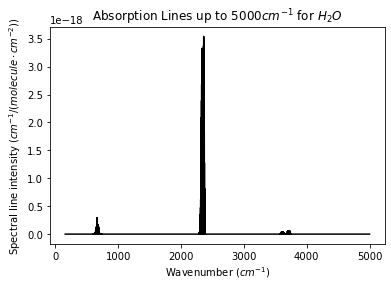

In [27]:
plt.plot(CO2.nu,CO2.absorbtion_coeff,c = 'black')
plt.ylabel('Spectral line intensity ($cm^{-1}/(molecule \cdot cm^{-2}))$')
plt.xlabel('Wavenumber ($cm^{-1})$')
plt.title('Absorption Lines up to $5000cm^{-1}$ for $H_2O$')

Th discrete nature, of the peaks, is approximate when the molecule is in a sea of other molecules, the constant collisions change energy eigenvalues of the transition due to collision times being smaller than the emission processes, the shortened characteristic time gives higher energy uncertainty. This is well described by a lorentzian function withe HWHM(Half Width Half Max) = $ \gamma_{air} $. In addition, self broadening of the emission occurs due to shorter lived excited states having higher uncertainty on the energy of the decay,which is also of a lorentzian, HWHM = $ \gamma_{self} $.  
$$ \gamma(p,T) = (\frac{T_{ref}}{T})^{n_{air}}(\gamma_{air}(p_{ref},T_{ref})(p-p_{self})+\gamma_{self}(p_{ref},T_{ref})p_{self})$$
The pressure and temperature dependant HWHM $\gamma$, is also dependant on $p_{self}$ which is the partial pressure of the gas in question. The data was from the HITRAN Database, and $p_{ref},T_{ref} = 1atm,\space 296k$.  
The lorentzian profile modelled: 
$$ f(\gamma,\nu,\nu_0) = \frac{1}{\pi}\frac{\gamma}{\gamma^2 +(\nu- \nu_0)^2}$$
Aside, doppler shifts can also be added, however, they have not been implemented.
An example Lorenzian profile has been plotted below.

<ipython-input-7-377a8ee0117f>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot([5,x[intersect]],[hm,hm],Label = 'Half Width Half Max:$\gamma$',linestyle ='--',c = 'black')


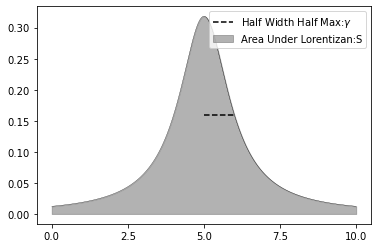

In [7]:
fig, ax =  plt.subplots()
x = np.linspace(0,10,100000)
y = Functions.lorenzian(x,5,1)
ax.plot(x,y,c = 'black', linewidth = 0.3)
ax.fill_between(x,0,y,color ='grey',alpha = 0.6,label = 'Area Under Lorentizan:S')
hm = np.max(y)/2
intersect = np.where(y > hm)[0][-1]
ax.plot([5,x[intersect]],[hm,hm],Label = 'Half Width Half Max:$\gamma$',linestyle ='--',c = 'black')
#plt.plot([5,5],[0,np.max(y)],c = 'black',linestyle ='-.',label ='Maximum')
ax.set_xticks(np.linspace(0,10,5))
plt.legend()
fig.savefig('./Figures/Lorentzian')

In order to calculate the optical thickness of a gas, which is how absorption is calculated. The Monochromatic Absorption Coefficient is obtained,$\kappa$ ($cm^{-1}/molecule\cdot cm^{-2}$) : 
$$ \kappa(\nu,T,p) = S(\nu)\cdot f(\gamma,\nu,\nu_0)$$
Where S ($cm^{-1}/molecule\cdot cm^{-2}$) is the Spectral Line Intensity and $f$ is the lorentzian.
When the Monochromatic Absorption Coefficient, is calculated, a lorentzian broadening is also applied to the top percentile of peaks. This may seem like a small sample but there is a lot of noise, and this retains the functional form of the distribution, without too much processing time. An example of this broadening is shown below. 
The Monochromatic absorption coefficient is related to the optical thickness by: 
$$ \Tau_{\nu} = \kappa\cdot \int[X]dl$$
Where [X] is the volume number density of particles. 

 For all absorption spectra, calculated, the blue line is used, to reduce computation time, however, the black line is an example of how, the profiles would look if a higher resolution was used. 
 The narrow broadening widths increase the total height of the peaks. 

In [8]:
##Code Showing fine resolution Lorenzian Broadening
start, stop = 140,180
###To increase the resolution a gas is defined with a much finer nu interval
coarse_coef = np.array(CO2.absorbtion_coeff)[start:stop]
coarse_nu = np.array(CO2.nu)[start:stop]
coarse_gamma_self = np.array(CO2.gamma_self)[start:stop]
coarse_gamma_air = np.array(CO2.gamma_air)[start:stop]
coarse_nair = np.array(CO2.n_air)[start:stop]

#find the absorbtion_peak for the CO2 in the range start stop
absorbtion_peaks, _ = find_peaks(coarse_coef)

##I make a newn gas object with nu values and a much higher resolution
CO2_prime = deepcopy(CO2)


nu = np.linspace(305,319,10000)
peaks = nair = np.zeros_like(nu)
gamma_self = np.zeros_like(nu)
gamma_air = np.zeros_like(nu)
coef = np.zeros_like(nu)

# What are the values of gamma,absorbtion_coeff,etc at the peak
coarse_peak_height = coarse_coef[absorbtion_peaks]
coarse_nu_peaks  = coarse_nu[absorbtion_peaks]
coarse_gamma_self_peaks = coarse_gamma_self[absorbtion_peaks]
coarse_gamma_air_peaks = coarse_gamma_air[absorbtion_peaks]
coarse_nair_peaks =coarse_nair[absorbtion_peaks]
#assign only the peak values of gamma,absorbtion_coeff,etc.They are placed in the array at the closest match of nu ie min(nu[peak]-nu_coarse[peak]) 
for i in range(len(coarse_nu_peaks)):
    ind = np.array(np.where(nu > coarse_nu_peaks[i])[0])[0]
    coef[ind] = coarse_peak_height[i]
    gamma_air[ind] = coarse_gamma_air_peaks[i]
    gamma_self[ind] = coarse_gamma_self_peaks[i]
    nair[ind] = coarse_nair_peaks[i]
#The arrays with only values at the peaks are then assigned as gas.parameter
CO2_prime.absorbtion_coeff  = coef
CO2_prime.gamma_self = (gamma_self)
CO2_prime.gamma_air = (gamma_air)
CO2_prime.n_air = (nair)
CO2_prime.nu = nu


<ipython-input-9-ad300c0c7e1d>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(no_broad_nu[index],no_broad_coef[index],Label = 'Spectral Line Intesity(SW)',linestyle = '',marker = 'x', c = 'purple')


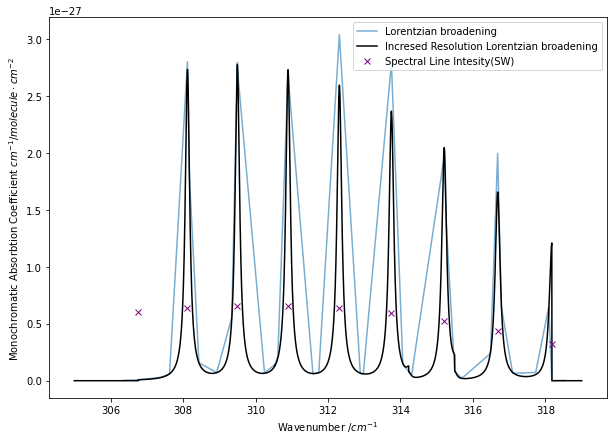

In [9]:
index = [0, 1, 2, 4, 5, 6, 8, 10, 11] #this removes the small peaks which can be seen but added clutter 
no_broad_nu = np.array(CO2.nu[start:stop].iloc[absorbtion_peaks])
no_broad_coef = (coarse_coef[absorbtion_peaks])

plt.figure(figsize=(10,7))
plt.plot(CO2.nu[start:stop],Functions.lorentzain_fit(CO2,0,threshold= 0, start= start,stop= stop),label = 'Lorentzian broadening',alpha = 0.6)
plt.plot(CO2_prime.nu,Functions.lorentzain_fit(CO2_prime,0,threshold= 0,Quantile = False,Dataframe= False ),label = 'Incresed Resolution Lorentzian broadening',c = 'black')
plt.plot(no_broad_nu[index],no_broad_coef[index],Label = 'Spectral Line Intesity(SW)',linestyle = '',marker = 'x', c = 'purple')
plt.xlabel('Wavenumber $/cm^{-1}$')
plt.ylabel(r'Monochromatic Absorbtion Coefficient $cm^{-1}/molecule\cdot cm^{-2}$')
plt.legend()
plt.savefig('./Figures/High_Resolution_Broadening')

### What Happens To Incoming radiation
For incoming radiation, the main obstacle, to transmission through the atmosphere is Rayleigh scattering, by causing the particle to oscillate at the same frequency as the incoming wave. The particle becomes an electric dipole and proceededs to oscillate itself. This scatters the incoming Radiation. This effect dominates when the particles are much smaller than the wavelength of the molecules. The scattering effect is $ \propto \nu^4$.
An empirical form for the optical depth is used. https://journals.ametsoc.org/view/journals/atot/16/11/1520-0426_1999_016_1854_orodc_2_0_co_2.xml
$$ \tau_R = \sigma \frac{PA}{m_ag}$$
$$ \sigma  = \frac{1.045 599 6 - 341.290 61 \lambda^{-2} -0.902 308 50\lambda^{2}}{1 + 0.002 705 988 9 \lambda^{-2} -85.968 563\lambda^{2}}
 


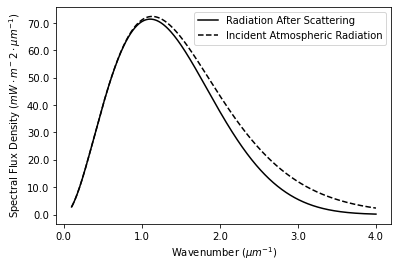

In [10]:
nu = np.linspace(1000,40000,1000)
stop = 1000
tau_r = Functions.Rayligh_optical_depth(nu[:stop])
flux = Functions.plank_nu(nu,5770,Flux= True)*(R_Sun/D_Earth_Sun)**2
I_surf =  np.exp(-tau_r)*flux[:stop] 
plt.plot(nu[:stop],I_surf, c = 'black', label = 'Radiation After Scattering')
plt.plot(nu,flux, c = 'black', linestyle = '--', label = 'Incident Atmospheric Radiation')
plt.xlabel('Wavenumber ($\mu m^{-1}$)')
plt.xticks(np.linspace(0,40000,5),np.linspace(0,4,5))
plt.yticks(np.linspace(0,.07,8),np.linspace(0,70,8))
plt.ylabel('Spectral Flux Density $(mW \cdot m^-2 \cdot \mu m^{-1})$' )
plt.legend()

As can be seen in the figure above,The effect of Rayleigh scattering dominates at higher wavenumbers. This highlights the reason that only Short Wave Radiation needs to be included in scattering calculations.   
$$\frac{Flux\ arriving\ at\ Earth's\ Surface}{Incident\ atmospheric\ Flux} = 0.891 $$ 
This is not the complete story as Molecules absorb in the higher wavenumbers. In particular $O_3$ and $H_2O$ have substantial absorption cross sections.  

### Ozone and Water 
Ozone is a particularly important gas in our atmosphere as its main cross section is at high wavenumbers. Which gives it the property of blocking high energy cancer causing photons. 
The HITRAN database currently, has the absorption lines for $O_3$ up to $0 <\nu < 7000 cm^{-1}$ and absorption cross section from $41000 <\nu < 330000 cm^{-1}$. This Provides a large window, in which the transmission is not effected in this report. The plot below, is the continuous section of $O_3$.  

([<matplotlib.axis.XTick at 0x1dcb71146d0>,
 [Text(40000.0, 0, '4.0'),
  Text(117500.0, 0, '12.0'),
  Text(195000.0, 0, '20.0'),
  Text(272500.0, 0, '27.0'),
  Text(350000.0, 0, '35.0')])

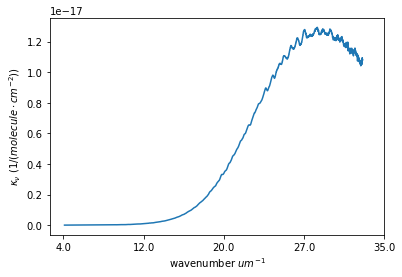

In [11]:
O3 = Functions.gas_with_crossection("./Absorbtion Continua/Ozone Cross Sections/",48,0.08)
wavenumber = O3.nu
kappa = O3.corossection(298)
tau = kappa
plt.plot(wavenumber,tau)
plt.xlabel('wavenumber $um^{-1}$')
plt.ylabel(r'$ \kappa_\nu$ ($1/(molecule \cdot cm^{-2})$)')    
plt.xticks(np.linspace(40000,350000,5),physicsbasics.standard_form(np.linspace(4,35,5),1))
            

Water vapour, in comparison to other common greenhouse gas has a larger range in which there are significant absorption peaks, which in conjunction to its high abundance in the atmosphere, means that its effect on incoming radiation, is important to note. 

The plot below, combineds both the absorption peaks from water vapour and the effect of Rayleigh scattering. This produces a net transmission of flux of 84%, which is higher than expected, The plots produced by Robert Rohde https://twitter.com/rarohde/status/1197147289229385728?lang=en, give this value to be at 70% with a full compliment of atmospheric gases. 
Further gases could be introduced on the incoming profile, with relative ease, however, the main gases I have tried have vastly limited line by line absorption ranges, and so their profiles for incoming radiation are only in the infrared which is the beginning tail of the curve. The HITRAN Database has a small part of the database called HITEMP, which has the line by line cross section data for a few molecules up to very high wavenumbers. This is the next step to make a more complete incoming radiation code.  Note: These data files are rather large and I had some difficulties trying to do this in a short space of time. 

Text(0, 0.5, 'Spectral Flux Density $(mW \\cdot m^-2 \\cdot \\mu m^{-1})$')

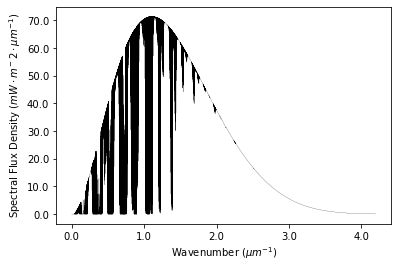

In [12]:
tau_r = Functions.Rayligh_optical_depth(H2O.nu)
tau = H2O.Tau_for_whole_atmosphere(30000,0)
tau_t = tau+tau_r
flux = Functions.plank_nu(H2O.nu,5770,Flux=True)*(R_Sun/D_Earth_Sun)**2
I_surf = flux*np.exp(-tau_t)
plt.plot(H2O.nu,I_surf,c = 'black', linewidth = 0.2) 
plt.xlabel('Wavenumber ($\mu m^{-1}$)')
plt.xticks(np.linspace(0,40000,5),np.linspace(0,4,5))
plt.yticks(np.linspace(0,.07,8),np.linspace(0,70,8))
plt.ylabel('Spectral Flux Density $(mW \cdot m^-2 \cdot \mu m^{-1})$' )


In [13]:
trans = Functions.Flux_Int(I_surf,H2O.nu)/Functions.Flux_Int(flux,H2O.nu)
print(trans)

0.8409343480331634


## Outgoing Radiation 
The main aim of the project was to plot the Figures similar to those produced by Robert Rohde in his twitter posts, these provide a visual communication of the role that different gases play in the atmosphere. However Dr. Rhode's graphs are all against wavelength. This is the more common way for plank spectrums to be displayed. When plotted against wavenumber, the photon energy increases to the right.
The plot below, includes the three molecules of interest, H2O, CO2 and CH4. 
The Total absorption of these three gases using this method is 37% of total flux from the surface is retained in the atmosphere, again this is lower than that acquired by alternative methods. The Profiles shown in the reslts from Robert Rhode show a lower resolution and smoother curve. If the absorption lines were increased in width this would drastically alter the energy transmission. However, there is no motivation for this as the line by line cross sections are implemented according to the HITRAN database. 

Text(0.5, 0, 'Wavenumber ($cm^{-1}$)')

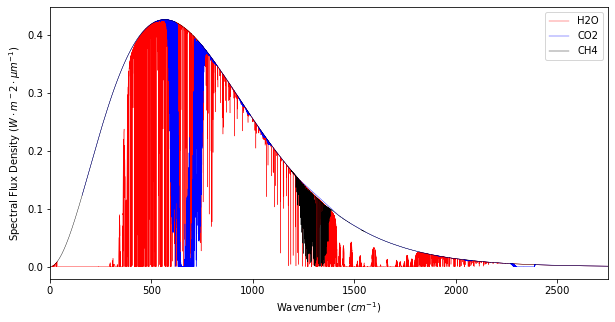

In [26]:
colors = ["red",'blue', 'black','green']
gases = [H2O_,CO2,CH4,N2O]
gn = ['H2O','CO2','CH4','N2O']
flux , nu ,inc = Functions.multigas(gases,0,1000, Ground = False)
fig = plt.figure(figsize= (10,5))
for i in range(3):
    plt.plot(nu[i],flux[i],c = colors[i], label = gn[i], linewidth = 0.4)

plt.legend()
plt.xlim(0,2750)
plt.ylabel('Spectral Flux Density $(W \cdot m^-2 \cdot \mu m^{-1})$' )
plt.xlabel('Wavenumber ($cm^{-1}$)')


2500000.0
1428571.4285714286
